In [69]:
import os
import fnmatch
import json
import dateutil.parser
import pprint
import glob
import pandas as pd

In [91]:
with open("/treehouse/treeshop/manifests/133_149.2.txt") as f:
    ids = sorted([word.strip() for line in f.readlines() for word in line.split(',') if word.strip()])
print("Found {} ids".format(len(ids)))

Found 76 ids


In [92]:
# All methods
methods = [json.loads(open(m).read()) for id in ids 
           for m in glob.glob("/treehouse/archive/downstream/{}/secondary/*/methods.json".format(id))]
print("Found {} secondary outputs".format(len(methods)))

Found 222 secondary outputs


In [93]:
# UMEND QC
reports = [json.loads(open(m).read()) for id in ids 
           for m in glob.glob("/treehouse/archive/downstream/{}/secondary/*bam-umend-qc*/bam_umend_qc.json".format(id))]
print("Found {} qc outputs".format(len(reports)))

print("{} Passed".format(sum(r["qc"] == "PASS" for r in reports)))

Found 45 qc outputs
45 Passed


In [94]:
runtimes = pd.DataFrame([{"id": m["sample_id"], 
               "pipeline": m["pipeline"]["docker"]["url"],
               "duration": (dateutil.parser.parse(m["end"]) 
                            - dateutil.parser.parse(m["start"])).total_seconds()/(60*60)}
 for m in methods])
runtimes

,duration,id,pipeline
0,0.009463,THR28_0687_S01,https://hub.docker.com/alpine
1,10.679518,THR28_0687_S01,https://quay.io/ucsc_cgl/rnaseq-cgl-pipeline
2,3.681605,THR28_0687_S01,https://hub.docker.com/r/ucsctreehouse/bam-ume...
3,1.048336,THR28_0687_S01,https://hub.docker.com/r/ucsctreehouse/fusion
4,0.104117,THR28_0687_S01,https://hub.docker.com/r/ucsctreehouse/mini-va...
5,0.011715,THR28_0688_S01,https://hub.docker.com/alpine
6,10.967580,THR28_0688_S01,https://quay.io/ucsc_cgl/rnaseq-cgl-pipeline
7,3.846085,THR28_0688_S01,https://hub.docker.com/r/ucsctreehouse/bam-ume...
8,1.133938,THR28_0688_S01,https://hub.docker.com/r/ucsctreehouse/fusion
9,0.104815,THR28_0688_S01,https://hub.docker.com/r/ucsctreehouse/mini-va...


In [95]:
runtimes.pivot(columns="pipeline").describe()

duration  \
pipeline https://hub.docker.com/alpine   
count                        52.000000   
mean                          0.009470   
std                           0.002582   
min                           0.005795   
25%                           0.007970   
50%                           0.008763   
75%                           0.010134   
max                           0.018955   

                                                              \
pipeline https://hub.docker.com/r/ucsctreehouse/bam-umend-qc   
count                                             45.000000    
mean                                               2.286763    
std                                                0.721733    
min                                                1.396169    
25%                                                1.818495    
50%                                                2.056677    
75%                                                2.524647    
max                                                4.840974    

                                                        \
pipeline https://hub.docker.com/r/ucsctreehouse/fusion   
count                                        39.000000   
mean                                          1.393958   
std                                           0.943699   
min                                           0.534092   
25%                                           0.718933   
50%                                           1.081087   
75%                                           1.605828   
max                                           4.345106   

                                                               \
pipeline https://hub.docker.com/r/ucsctreehouse/mini-var-call   
count                                             39.000000     
mean                                               0.068342     
std                                                0.020966     
min                                                0.038685     
25%                                                0.053458     
50%                                                0.061100     
75%                                                0.077850     
max                                                0.135050     

                                                       
pipeline https://quay.io/ucsc_cgl/rnaseq-cgl-pipeline  
count                                       47.000000  
mean                                         6.588984  
std                                          2.096235  
min                                          3.965746  
25%                                          5.015539  
50%                                          6.014794  
75%                                          7.460424  
max                                         12.860606

pipeline
https://hub.docker.com/alpine                           [[Axes(0.125,0.125;0.775x0.755)]]
https://hub.docker.com/r/ucsctreehouse/bam-umend-qc     [[Axes(0.125,0.125;0.775x0.755)]]
https://hub.docker.com/r/ucsctreehouse/fusion           [[Axes(0.125,0.125;0.775x0.755)]]
https://hub.docker.com/r/ucsctreehouse/mini-var-call    [[Axes(0.125,0.125;0.775x0.755)]]
https://quay.io/ucsc_cgl/rnaseq-cgl-pipeline            [[Axes(0.125,0.125;0.775x0.755)]]
dtype: object

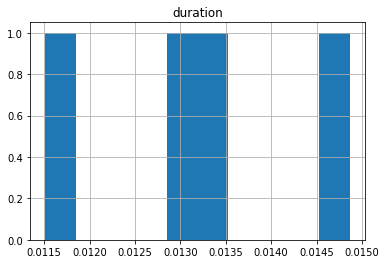

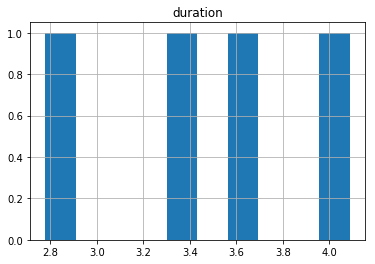

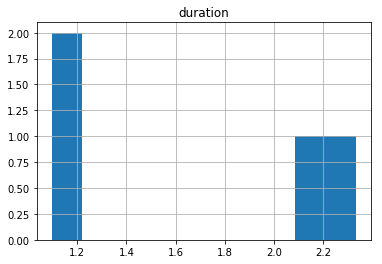

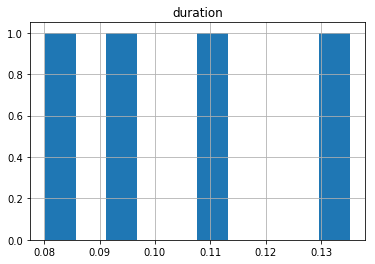

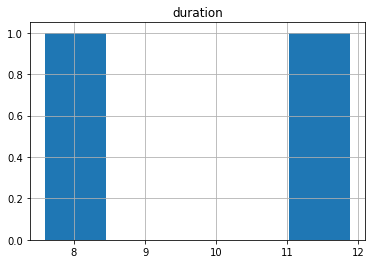

In [82]:
%matplotlib inline
runtimes.groupby("pipeline").hist()